In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d_data= pd.read_csv("deliveries.csv")
m_data= pd.read_csv("matches.csv")

In [3]:
m_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
d_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
m_data['team1'].value_counts()

Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [7]:
#changeing the names 
def name_changer(data):
    if data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data= 'Rising Pune Supergiants'
    elif data=='Delhi Daredevils':
        data='Delhi Capitals'
    return data

In [8]:
#applying changes to matches dataset
m_data['team2']=m_data['team2'].apply(lambda x:name_changer(x))
m_data['team1']=m_data['team1'].apply(lambda x:name_changer(x))

m_data['toss_winner']=m_data['toss_winner'].apply(lambda x:name_changer(x))

m_data['winner']=m_data['winner'].apply(lambda x:name_changer(x))

In [9]:
m_data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [10]:
m_data.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],['SRH','MI','GL','RPS','RCB','KKR','DC','KXP','CSK','RR','KTK'],inplace=True)

In [11]:
m_data.team1.unique()

array(['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DC', 'KXP', 'CSK', 'RR',
       'KTK'], dtype=object)

In [12]:
m_data.sample()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
511,512,2014,Chandigarh,2014-05-25,DC,KXP,KXP,field,normal,0,KXP,0,7,M Vohra,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,VA Kulkarni,NaN


In [13]:
m_data.isnull().sum() #chacking Null Values

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

Dropping umpires column

In [14]:
#umpire colums are dropped
m_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [15]:
m_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [16]:
m_data.winner.value_counts()

MI     92
CSK    79
KKR    77
RCB    73
SRH    71
KXP    70
RR     63
DC     62
RPS    27
GL     13
KTK     6
Name: winner, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3536\1558090837.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='winner',y='win_by_runs',data=m_data,ci=None)


<AxesSubplot:xlabel='winner', ylabel='win_by_runs'>

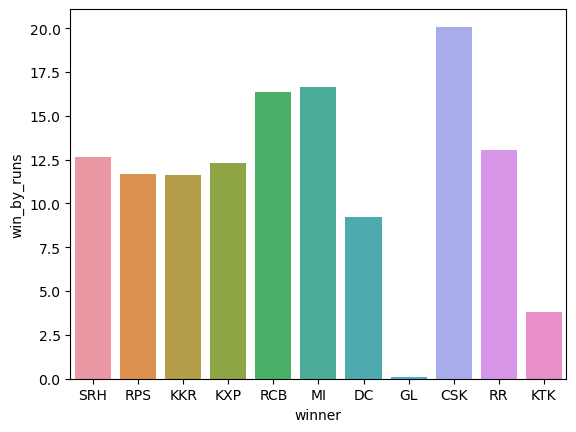

In [17]:
sns.barplot(x='winner',y='win_by_runs',data=m_data,ci=None)

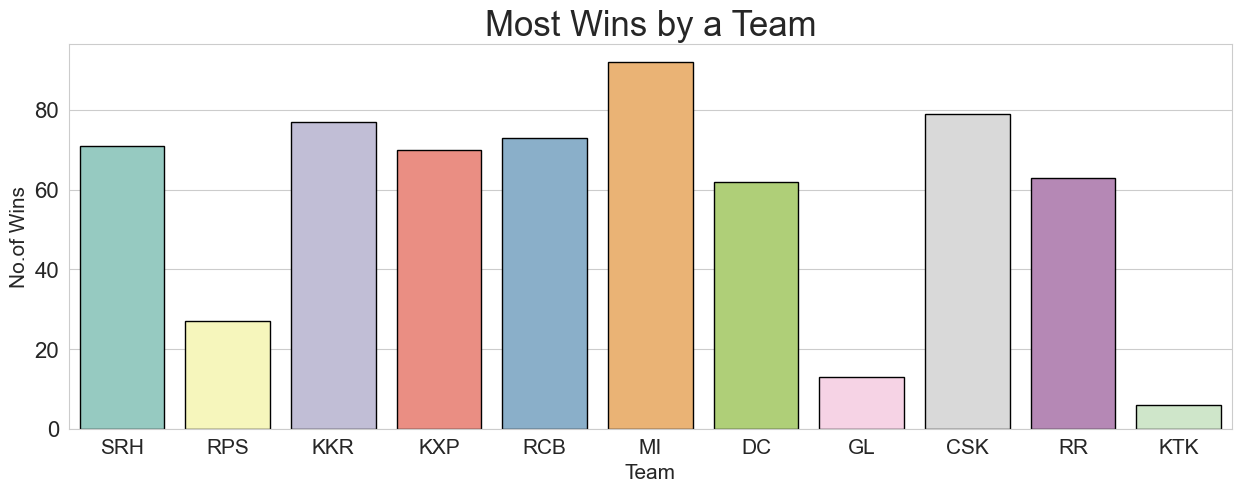

In [18]:
plt.figure(figsize=(15,5))

sns.set_style('whitegrid')

sns.countplot(x=m_data['winner'],palette='Set3',edgecolor='black')

plt.title('Most Wins by a Team', size=25)
plt.xlabel('Team',size=15)
plt.ylabel('No.of Wins',size=15)
plt.yticks(size=16)
plt.xticks(size=15)
plt.show()

In [27]:
m_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXP,KXP,field,normal,0,KXP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


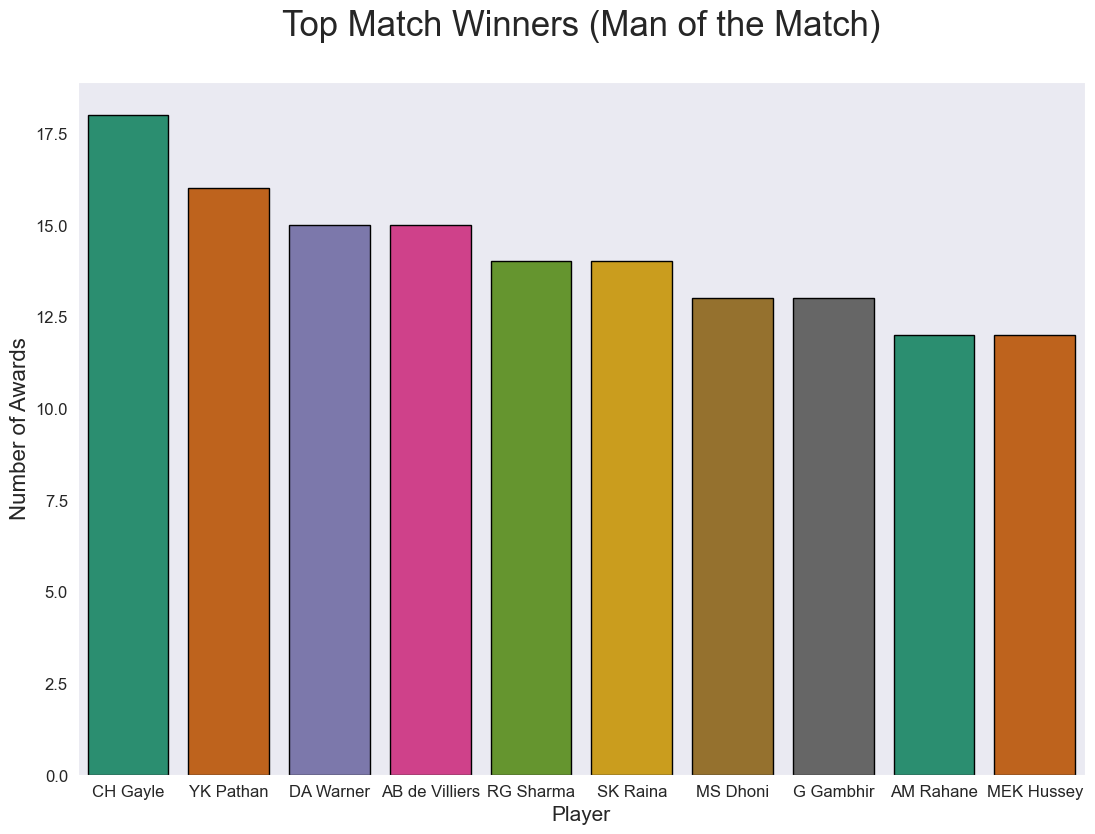

In [33]:
most_mom=m_data['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns=['Player','No. of Awards']

plt.figure(figsize=(13,9))

sns.barplot(x=most_mom['Player'],y=most_mom['No. of Awards'],palette='Dark2',edgecolor='black')
plt.xticks(rotation='horizontal')
plt.title('Top Match Winners (Man of the Match)\n',size=25)
plt.xlabel('Player',size=15)
plt.ylabel('Number of Awards',size=16)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

### 22nd Sept

In [34]:
m_data.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [35]:
d_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [36]:
best_batsman=d_data.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


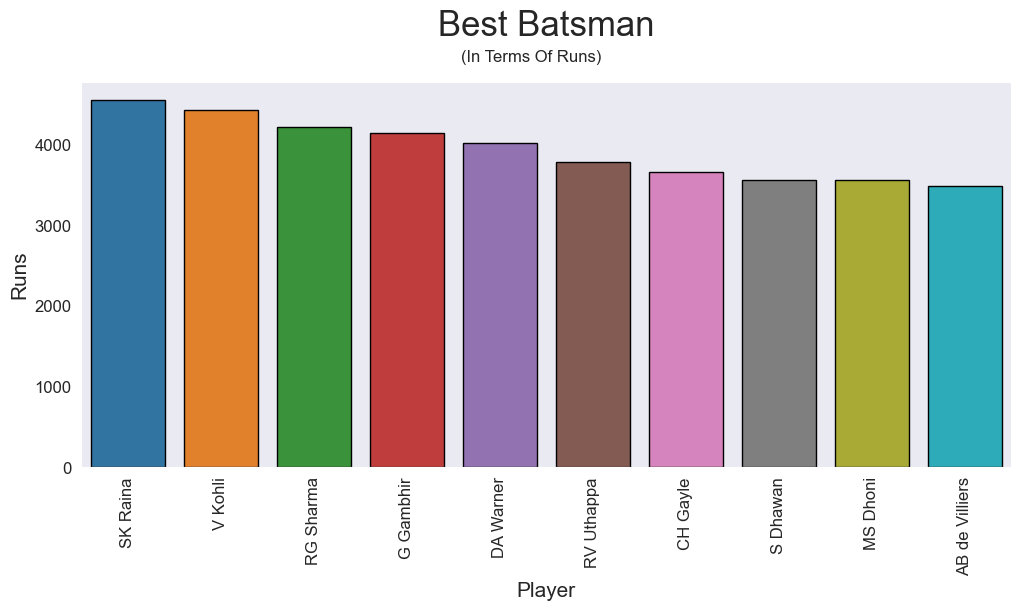

In [37]:
best_batsman=best_batsman.set_index('batsman').sort_values(by=['batsman_runs'],ascending=False).head(10)

plt.figure(figsize=(12,5))

sns.barplot(x=best_batsman.index,y=best_batsman['batsman_runs'],edgecolor='black')

plt.xticks(rotation='vertical')
plt.title('Best Batsman\n',size=25)
plt.suptitle('\n(In Terms Of Runs)')
plt.ylabel('Runs',size=15)
plt.xlabel('Player',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()



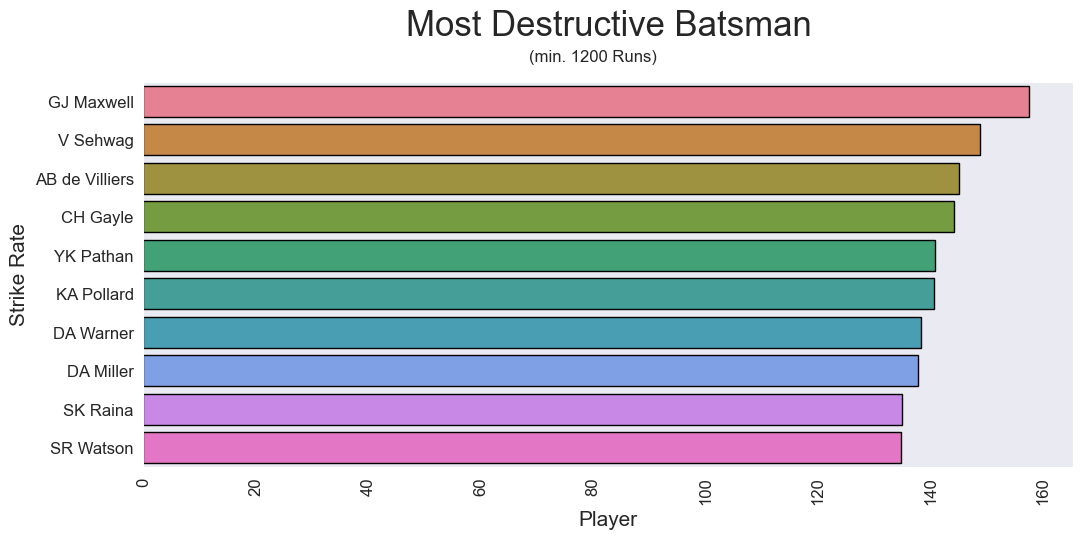

In [38]:
strike_rate=d_data.groupby(['batsman']).batsman_runs.sum().reset_index()
#strike_rate['balls']=d_data.groupby(['batsman']).batsman_runs.sum().reset_index()

strike_rate['balls']=d_data.groupby(['batsman']).ball.count().reset_index()['ball']

strike_rate['rate']=strike_rate['batsman_runs']/strike_rate['balls']*100

strike_rate=strike_rate[strike_rate['batsman_runs']>=1200].sort_values(by=['rate'],ascending=False).head(10)

plt.figure(figsize=(12,5))

sns.barplot(x=strike_rate['rate'],y=strike_rate['batsman'], palette= 'husl',edgecolor='black')

plt.xticks(rotation='vertical')
plt.title('Most Destructive Batsman\n',size=25)
plt.suptitle('\n(min. 1200 Runs)')
plt.ylabel('Strike Rate',size=15)
plt.xlabel('Player',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()




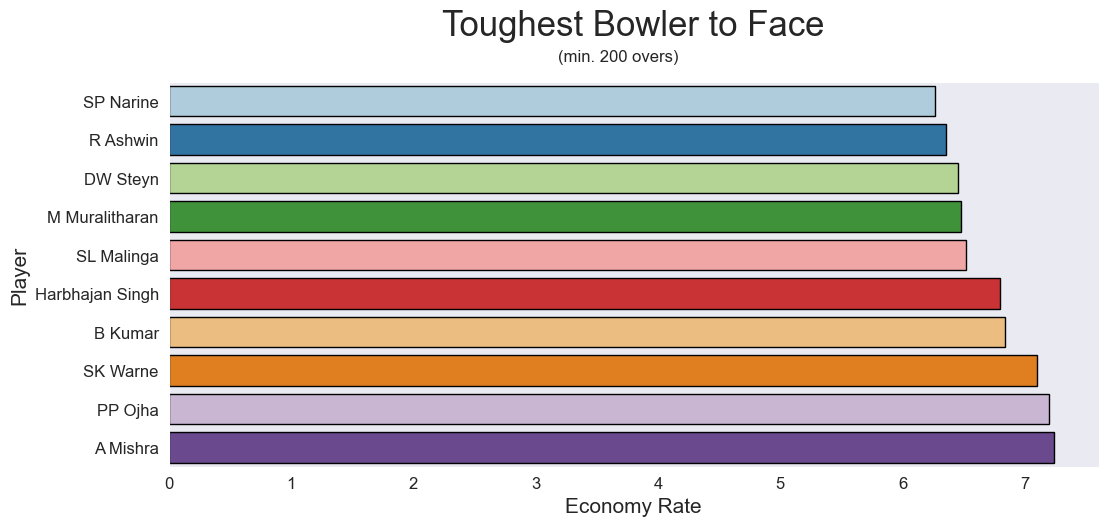

In [39]:
economy_rate=d_data.groupby(['bowler']).sum()

economy_rate['over']=d_data['bowler'].value_counts()/6

economy_rate['runs']=economy_rate['wide_runs']+economy_rate['noball_runs']+economy_rate['batsman_runs']
economy_rate=economy_rate[economy_rate['over'] >=200]
economy_rate['rate']=economy_rate['runs']/economy_rate['over']
economy_rate=economy_rate.sort_values(by=['rate'],ascending=True).head(10)

plt.figure(figsize=(12,5))

sns.barplot(x=economy_rate['rate'],y=economy_rate.index, palette= 'Paired',edgecolor='black')

plt.title('Toughest Bowler to Face\n',size=25)
plt.suptitle('\n(min. 200 overs)')
plt.ylabel('Player',size=15)
plt.xlabel('Economy Rate',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()



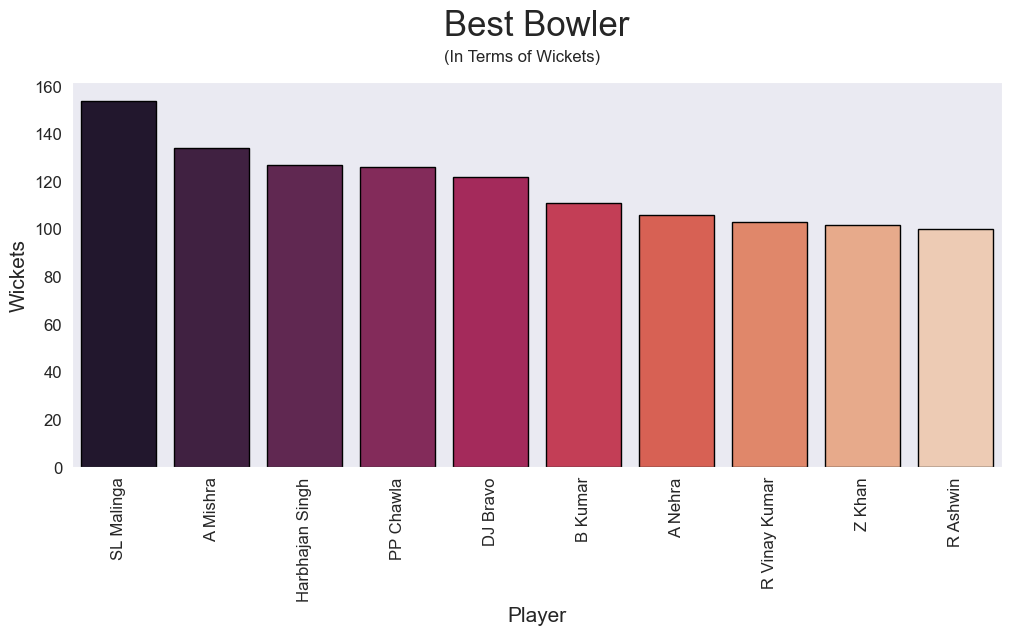

In [40]:
dismissal= ['caught','bowled','caught and bowled','hit wicket','lbw','stumped']

best_bowler= d_data.loc[d_data['dismissal_kind'].isin(dismissal)]

best_bowler= best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns =['bowler','wickets']

plt.figure(figsize=(12,5))
sns.barplot(x=best_bowler['bowler'],y=best_bowler['wickets'],palette='rocket',edgecolor='black')

plt.xticks(rotation='vertical')
plt.title('Best Bowler\n',size=25)
plt.suptitle('\n(In Terms of Wickets)')
plt.ylabel('Wickets',size=15)
plt.xlabel('Player',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

 ### wins at Homeground

In [41]:
# "ilock" is used to choose rows and coloumns we want in the data
# "groupby" is used to 
# "sort_values" is Used to make desending order

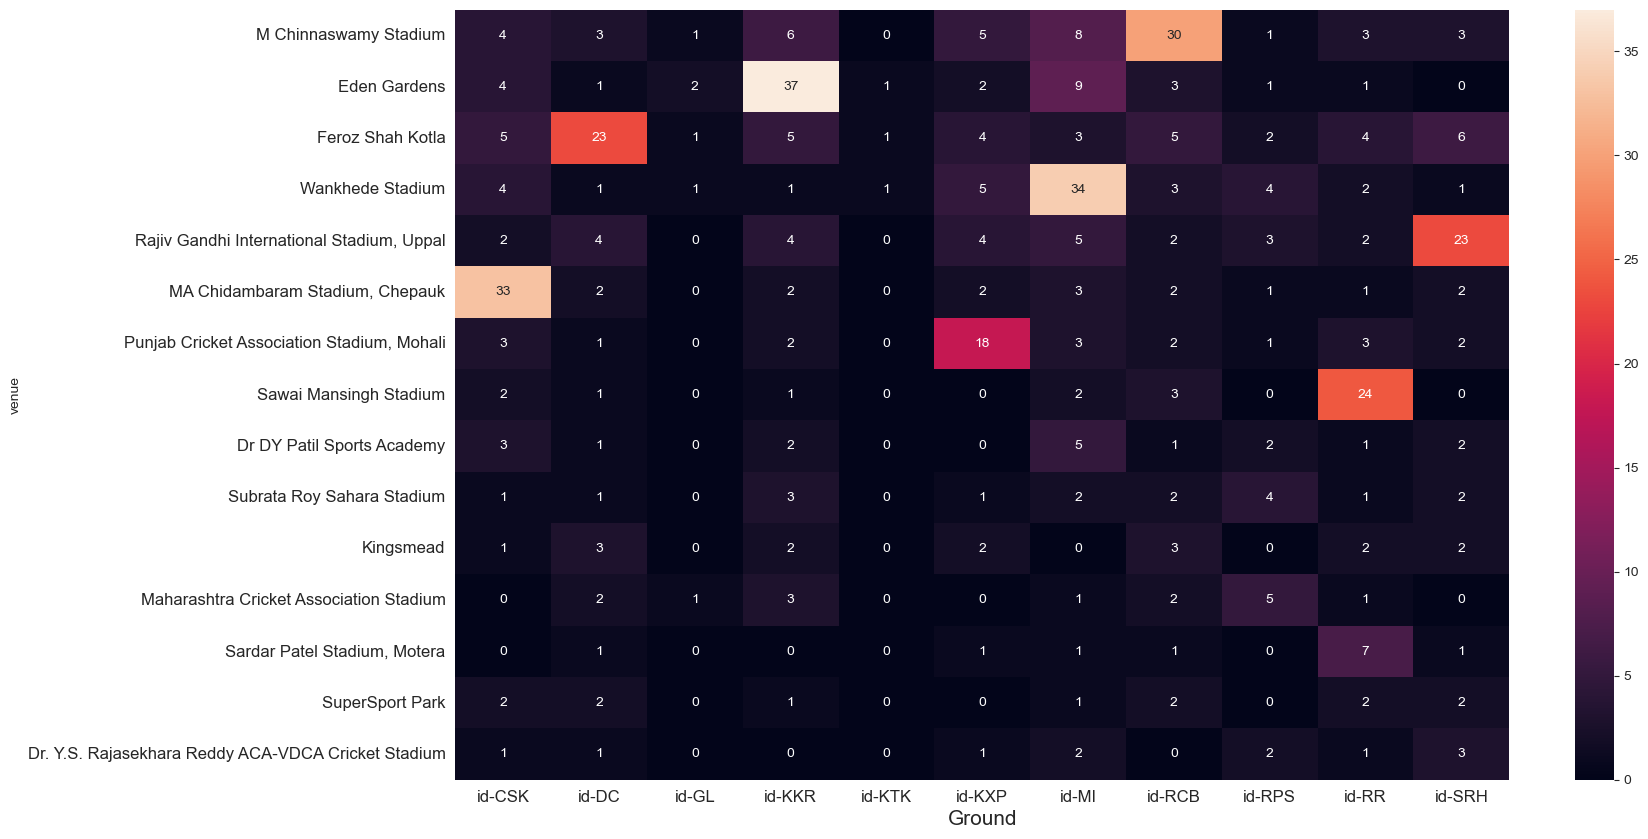

In [44]:
venue=m_data.groupby(['venue','winner']).count()
venue= venue.iloc[:,:1].reset_index()
venue= venue.pivot('venue','winner')

venue.fillna(0,inplace=True)
venue['total']=venue.sum(axis=1,skipna=False)
venue['total']
venue=venue.sort_values(by=['total'],ascending=False).head(15)
venue.drop(['total'],axis=1,inplace=True)

sns.set_style('dark')
plt.figure(figsize=(17,10))
sns.heatmap(data=venue, annot=True, cmap='rocket')
plt.xlabel('Team',size=15)
plt.xlabel('Ground',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

